<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/lindevanbeers/Lab-4/linde-report-lab-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Function approximation**
**Linde van Beers**

# **Abstract**



```
# This is formatted as code
```

Short summary of the lab report. State the objectives, methods used, main results and conlusions. 

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [2]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Author: Linde van Beers, 2020

# Based on a template:
# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)


# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

Give a short description of the problem investigated in the report, and provide some background information so that the reader can understand the context. 

Briefly describe what method you have chosen to solve the problem, and justify why you selected that method. 

Here you can express mathematics through Latex syntax, and use hyperlinks for references.

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/7500)

$
{\displaystyle \frac{\partial u}{\partial t}} + u\cdot \nabla u +\nabla p = f, \quad \nabla \cdot u=0$



# **Methods**

### L2 projection to pointwise linear approximation over mesh in 1D

In order to find the $L^2$-projection over a mesh we first find the matrix $A$ and the vector $b$, and then solve the linear system $A\alpha = b$ to find $\alpha$, the solution vector. 

$A$ is calculated by iterating over the subintervals $I_i, i\in 1,..,N$. For each interval we calculate $h_i$ the length of $I_i$. We then add this value (devided by 3 or 6) to the correct entrees in $A$ so that we get 

$a_{ii} = \frac{h_i}{3} + \frac{h_{i+1}}{3}$

$a_{ii+1} = \frac{h_i+1}{6}$

$a_{ii-1} = \frac{h_i}{6}$

$b$ is also calculated by iterating over the intervals. For each interval we evaluate the function at the start $l$ and end $r$ of the interval, from which we derive the interpolant at that interval: 

$\pi_hf(x) = f(l) + \frac{f(r)-f(l)}{h}(x-l)$

We then take the integrals:

$\int_{l}^{r}\pi_hf(x)\phi_{i,0}dx $

$=( \frac{f(l)}{2}+\frac{f(r)-f(l)}{3}) * h$ and 

$\int_{l}^{r}\pi_hf(x)\phi_{i-1,1}dx $

$=(f(l) + \frac{f(r)-f(l)}{2}-\frac{f(l)}{2}- \frac{f(r)-f(l)}{3}) * h$ 

The outcome of the first we add to $b_i$ and the outcome of the second to $b_{i-1}$ such that the entry for $b$ for every node in the end contains the integral:

$\int_{I_i + I_{i+1}}\pi_hf(x)\phi_{i}(x)dx $

Then we solve the linear system and find our solution vector $\alpha$, containing the evaluation of our projection in each point of the mesh. 

In [0]:

def l2_projection(f, mesh):
  N = len(mesh)
  b = np.zeros(N)
  A = np.zeros([N,N])

  for k in range(1, N):
    h = mesh[k]-mesh[k-1]
    A[k-1, k-1] += h/3
    A[k-1,k] += h/6
    A[k,k] += h/3
    A[k,k-1]+= h/6

    l = f(mesh[k-1])
    r = f(mesh[k])
    b[k] += (l/2 + (r-l)/3) * h
    b[k-1] += (l + (r-l)/2 - (l/2) - (r-l)/3) * h
  
  sol = np.linalg.solve(A,b)

  return sol

def evaluate(p, x, mesh):
  N = len(mesh)
  if x == mesh[0]:
    return p[0]
  
  for i in range(1,N):
    if x == mesh[i]:
      return p[i]
    elif x > mesh[i-1] and x < mesh[i]:
      return p[i-1] + (p[i]-p[i-1])/((mesh[i]-mesh[i-1])) * (x - mesh[i-1])



# **Results**

Present the results. If the result is an algorithm that you have described under the *Methods* section, you can present the data from verification and performance tests in this section. If the result is the output from a computational experiment this is where you present a selection of that data. 

test 1:
f(x) = 2.0 * x^3 + 0.0 * x^2 + 32.0 * x^1 + 34.0
convergence of average residual error for different meshes:
mesh of 10 nodes: 7.291735003412586
mesh of 20 nodes: 1.5858190696930075
mesh of 30 nodes: 0.6867084865592107
mesh of 40 nodes: 0.3861303308397469
mesh of 50 nodes: 0.16006701202619616
mesh of 60 nodes: 0.1683866695784968
mesh of 70 nodes: 0.12286037637764388
mesh of 80 nodes: 0.06295622849713764
mesh of 90 nodes: 0.07423201564307297
test 2:
f(x) = 2.0 * x^7 + 0.0 * x^6 + 1.0 * x^5 + 2.0 * x^4 + 7.0 * x^3 + 14.0 * x^2 + 24.0 * x^1 + 90.0
convergence of average residual error for different meshes:
mesh of 10 nodes: 243224.01956265804
mesh of 20 nodes: 35318.58761527716
mesh of 30 nodes: 17610.19896738688
mesh of 40 nodes: 11955.738976304305
mesh of 50 nodes: 2335.23953731069
mesh of 60 nodes: 5066.011250658412
mesh of 70 nodes: 3599.288852055238
mesh of 80 nodes: 1002.2861532466818
mesh of 90 nodes: 2322.428341707699
test 3:
f(x) = 4.0 * x^3 + 10.0 * x^2 + 39.0 * x^1 + 17

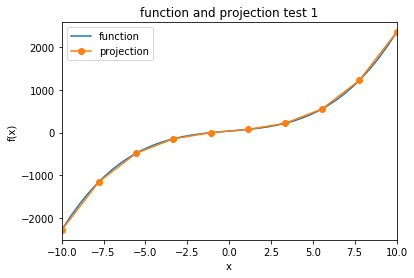

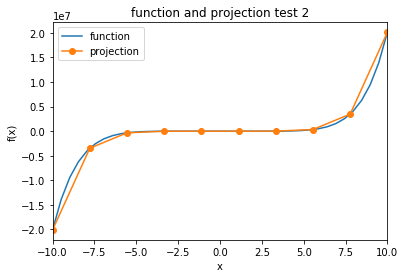

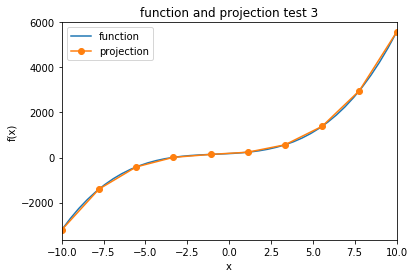

In [269]:
class RandomPoly:
  def __init__(self):
    self.degree = np.random.randint(1, 10)
    self.alpha = np.zeros(self.degree)
    for i in (range(self.degree)):
      self.alpha[i] = int(np.random.rand() * 200/pow(i+1,2))
       
    print("f(x) = ", end = '')
    for i in (range(self.degree-1, 0,-1)):
      print(self.alpha[i], "* x^",end = '')
      print(i , "+ ",end = '')
    print(self.alpha[0])

  def function(self,x):
    alph = self.alpha
    y=0
    for i in range(self.degree):
      y += alph[i] * pow(x,i)
    return y

test = 1
print("test %s:"%test)
f = RandomPoly()

print("convergence of average residual error for different meshes:")
for j in range (10,100,10):
  mesh = np.array(np.linspace(-10,10,j))
  mesh = np.sort(mesh)
  p = l2_projection(f.function, mesh)

  

  xs = np.array(np.linspace(mesh[0],mesh[-1],40))
  fx = np.zeros(len(xs))
  for i in range(len(xs)):
    fx[i] = f.function(xs[i])
  
  if j == 10:
    fig = plt.figure()
    sub = fig.add_subplot(111)
    sub.plot(xs,fx, label = "function")
    sub.plot(mesh, p, 'o-', label = "projection")
    sub.set_xlabel("x")
    sub.set_ylabel("f(x)")
    sub.set_xlim(mesh[0],mesh[-1])
    plt.legend()
    plt.title("function and projection test %s" % test)
  
  t = np.array(np.linspace(mesh[0],mesh[-1],17))
  fxtest = np.zeros(17)
  ptest = np.zeros(17)
  for i in range(17):
    fxtest[i] = f.function(t[i])
    ptest[i] = evaluate(p,t[i], mesh)
  dist = np.linalg.norm(fxtest-ptest)
  print("mesh of %s nodes:"% j, dist/17)



test = 2
print("test %s:"%test)
f = RandomPoly()

print("convergence of average residual error for different meshes:")
for j in range (10,100,10):
  mesh = np.array(np.linspace(-10,10,j))
  mesh = np.sort(mesh)
  p = l2_projection(f.function, mesh)


  xs = np.array(np.linspace(mesh[0],mesh[-1],40))
  fx = np.zeros(len(xs))
  for i in range(len(xs)):
    fx[i] = f.function(xs[i])

   
  if j == 10:
    fig = plt.figure()
    sub = fig.add_subplot(111)
    sub.plot(xs,fx, label = "function")
    sub.plot(mesh, p, 'o-', label = "projection")
    sub.set_xlabel("x")
    sub.set_ylabel("f(x)")
    sub.set_xlim(mesh[0],mesh[-1])
    plt.legend()
    plt.title("function and projection test %s" % test)
  
  t = np.array(np.linspace(mesh[0],mesh[-1],17))
  fxtest = np.zeros(17)
  ptest = np.zeros(17)
  for i in range(17):
    fxtest[i] = f.function(t[i])
    ptest[i] = evaluate(p,t[i], mesh)
  dist = np.linalg.norm(fxtest-ptest)
  print("mesh of %s nodes:"% j, dist/17)


test = 3
print("test %s:"%test)
f = RandomPoly()

print("convergence of average residual error for different meshes:")
for j in range (10,100,10):
  mesh = np.array(np.linspace(-10,10,j))
  mesh = np.sort(mesh)
  p = l2_projection(f.function, mesh)

  xs = np.array(np.linspace(mesh[0],mesh[-1],40))
  fx = np.zeros(len(xs))
  for i in range(len(xs)):
    fx[i] = f.function(xs[i])

  if j == 10:
    fig = plt.figure()
    sub = fig.add_subplot(111)
    sub.plot(xs,fx, label = "function")
    sub.plot(mesh, p, 'o-', label = "projection")
    sub.set_xlabel("x")
    sub.set_ylabel("f(x)")
    sub.set_xlim(mesh[0],mesh[-1])
    plt.legend()
    plt.title("function and projection test %s" % test)
  
  t = np.array(np.linspace(mesh[0],mesh[-1],17))
  fxtest = np.zeros(17)
  ptest = np.zeros(17)
  for i in range(17):
    fxtest[i] = f.function(t[i])
    ptest[i] = evaluate(p,t[i], mesh)
  dist = np.linalg.norm(fxtest-ptest)
  print("mesh of %s nodes:"% j, dist/17)




# **Discussion**

Summarize your results and your conclusions. Were the results expected or surprising. Do your results have implications outside the particular problem investigated in this report? 

# **APPENDIX**

In this appendix some examples are given to express and visualizing mathematical concepts such as vectors, matrices, meshes and functions. 

This is not part of the template report for the course.

# **Vector**

In this cell some basic commands are introduced for how to define and process a vector, where the NumPy array data type is used. 

In [0]:
# Just a test
# Create a vector as a NumPy array
x = np.array([1,2,3,4])

# Print various attributes of the vector
print('x =',x)
print('x[2] =',x[2])
print('x[0:2] =',x[0:2])
print('x.shape =',x.shape)
print('x.ndim =',x.ndim)
print('x.size =',x.size)
print('x.dtype =',x.dtype)

# Print the elements of vector x
for i in range(x.size):
  print("x[",i,"] =",x[i])

# Assign a float value to the int vector x
x[1] = 2.1
print('x =',x)

# Copy the int vector x to a float vector xf
xf = x.astype(float)
xf[1] = 2.1
print('xf =',xf)
print('xf.dtype =',xf.dtype)

# Create a complex vector 
y = np.array([2,3,4], dtype=complex)
print('y =',y)
print('y.dtype =',y.dtype)

# Create a vector z by defining a range through an increment
z = np.arange(12, 28, 4.5)
print('z =',z)

# Overwrite the vector z by a vector of uniformly spaced elements in a range
pi=np.pi
pi
z = np.linspace(0, 2*pi, 5)
print('z =',z)

# Visualize the vector in a plot. 
plt.figure()
plt.plot(x,2*x,'ro-')
plt.show()

# **Matrix**

In this cell some basic commands for defining and processing a matrix
is introduced, where we use the NumPy array data type. 

In [0]:
# Define a matrix as a NumPy array
A = np.array([[2,4,6], [3,6,9], [1,2,1]])

# Print various attributes of the matrix 
print('A =',A)
print('A[1,0] =',A[1,0])
print('A.shape =',A.shape)
print('A.ndim =',A.ndim)
print('A.size =',A.size)

# Plot the matrix
plt.figure()
plt.plot(A,'o-')

# Construct a simple sparse matrix class using the CRS data structure
class spMatrix:
  def __init__(self, val, col_idx, row_ptr):
    self.val = val
    self.col_idx = col_idx
    self.row_ptr = row_ptr
    
# Create a sparse matrix object 
val = np.array([3, 2, 2, 2, 1, 1, 3, 2, 1, 2, 3])
col_idx = np.array([1, 2, 4, 2, 3, 3, 3, 4, 5, 5, 6])
row_ptr = np.array([1, 4, 6, 7, 9, 10])
spA = spMatrix(val, col_idx, row_ptr)

# Print sparse matrix object attributes
print('Sparse matrix values: \n',spA.val)
print('Sparse matrix column indices: \n',spA.col_idx)
print('Sparse matrix row pointer: \n',spA.row_ptr)
    

# **Function**

In this cell we illustrate how functions are defined. 

In [0]:
# Define a function f(x,y)
def f(x,y):
  return x + y 

# Verify the function output
print('f(3,4) =',f(3,4))

# Define a function of a function
def g1(fcn,arg1,arg2):
  z = fcn(arg1,arg2)
  print('z =',z)

# Call the function
g1(f,6,7)

# Define a function of a function with arguments in a list or array
def g2(fcn,arg):
  z = fcn(*arg)
  print('z =',z)
  
# Call the function with arguments as list and array
xlist = [8,9]
xarray = np.array([11,3])
g2(f,xlist)
g2(f,xarray)

# Define a function to format the print out for a matrix 
def printMatrix(A):
   rows = A.shape[0]
   cols = A.shape[1]
   for i in range(0,rows):
      for j in range(0,cols):
         print(A[i,j]," ", end='')
      print()

# Define matrix      
A = np.array([[1,2,3], [4,5,6], [7,8,9]])

# Verify the function output
print('A =', A)
print('A =')
printMatrix(A)
print('A^T =')
printMatrix(A.transpose())

# Plot a Euclidian position vector v 
def plotEVector(vec):
  plt.figure()
  plt.xlim([-1.5*vec[0], 1.5*vec[0]])
  plt.ylim([-1.5*vec[1], 1.5*vec[1]])
  plt.quiver(0, 0, vec[0], vec[1], scale=1, scale_units='xy', angles='xy')
  plt.show()

v = np.array([3,4])
plotEVector(v)




# **Plot**

In [0]:
# Define a range for a parameter t
t = np.arange( 0.0, 10, 0.5)

# Initialize a new figure and set the size 
plt.figure(2)
plt.figure(figsize=(12,6))

# Define a subplot structure and choose the first subplot 
plt.subplot(121)

# Plot a standard NumPy function against the parameter t
plt.plot(t,np.cos(t))

# Set plot labels and title for the subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('My plot: $y = cos(x)$')

# Choose the other subplot
plt.subplot(122)

# Plot three functions in the same subplot
plt.plot(t, np.sin(f(t,3)), 'g*', t, 0.03*t**2, 'ro', t, 0.1*t, 'b')
plt.axis([-1, 12, -2 ,3])

# Show the figure
plt.show()

# Triangular **mesh**

This cell describes how to generate a triangular mesh from a point cloud by the Delaunay algorithm. It also illustrates how to access the mesh data structures. 

In [0]:
# Start the clock 
start = time.time()

# Generate a point cloud
Nx = 5
Ny = 5
hx = 1.0/(Nx-1)
hy = 1.0/(Ny-1)
x = np.zeros((Nx*Ny))
y = np.zeros((Nx*Ny))
for i in range(Nx):
  for j in range(Ny):
    x[i*Nx + j] = j*hx
    y[i*Nx + j] = i*hy

# Generate a mesh from the point cloud using a Delaunay algorithm
mesh = tri.Triangulation( x, y )

# Stop the clock
end = time.time()

# Print the measured time
print ("Mesh generation took: ", end - start, "seconds (wall-clock time)")

# Print mesh data structure
vertices = np.array([mesh.x, mesh.y])
print('vertices = \n', vertices)
print('edges = \n', mesh.edges)
print('triangles = \n', mesh.triangles)
print('neighbor triangles = \n', mesh.neighbors)

# Plot the mesh 
plt.figure(3)
plt.figure(figsize=(10,10))
plt.triplot(mesh, 'bo-', lw=1)
plt.title('Delaunay mesh')
plt.show()

# Define a function g(x,y)
def g(x,y):
    return np.sin(10*x)*np.cos(3*y)

# Plot the function g(x,y) in a contour plot
plt.figure(4)
plt.tricontour(mesh, g(x,y), cmap=plt.cm.spectral)
plt.show()

# Plot the function g(x,y) in 3D as a surface plot
fig = plt.figure(5)
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_trisurf(mesh, g(x,y), cmap=plt.cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax1.view_init(20,10)
plt.show()

# Parametric **curve**

This cell illustrates how to visualize a parametric curve.

In [0]:
# Define paramter range
t = np.linspace(0, 4*np.pi, 100)

# Define the curve
x = t*np.cos(t)
y = t*np.sin(t)
z = t

fig = plt.figure(6)
ax = fig.gca(projection = '3d')
ax.plot(x, y, z)
plt.title('Parametric curve')
plt.show()